<a href="https://colab.research.google.com/github/bettachini/21pF2/blob/main/%2002AmortiguadoForzado/20pF2_Forzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook realizado por Paulina Knees y Milton Katz para Física 2 1er cuatrimestre 2020


##Oscilaciones Forzadas



Vamos a ver cómo resolver el ejercicio 9 de la guía, el oscilador armónico forzado. Para eso me voy a agarrar algunas cosas de la solución del ejercicio 5 que está [acá](https://t.co/QsXVghfNoe), así que si todavía no lo vieron, vean ese primero.

El ejercicio propone un sistema masa resorte amortiguado como en el ejercicio 5 pero forzado con una fuerza $F(t) = F_0 \cos{\Omega t}$.

En el ejercicio que subimos el origen del eje x lo habíamos puesto en la pared de la siguiente manera:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1z-yq5AwCmI0Ox6I0zcllVYq6v6W4686J'  width="" height="200"/>
</center>
</figure>

La ecuación resultante de esto quedaba algo así

$$\ddot{x} + \Gamma \dot{x} + \omega_0^{2}x = \omega_0^2 l_0$$

Para hacerlo más sencillo, les propongo que este ejercicio lo encaremos con el eje en la posición en la que el resorte está relajado.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Ax5bCuls6pl-jjbQrcOb7r2-3Ws9kxAB'  width="" height="200"/>
</center>
</figure>


Considerando también la fuerza $F(t)$, pueden ver que la ecuación que queda es

$$\ddot{x} + \Gamma \dot{x} + \omega_0^{2}x = \frac{F_0}{m} \, \cos{\Omega t}$$

si bien no hice las cuentas son muy parecidas al ejercicio 5 y creo que las pueden hacer ustedes, cuando estén listos yo avanzo.

Primero resolvamos el sistema homogeneo, cuál es? 

$$\ddot{x} + \Gamma \dot{x} + \omega_0^{2}x = 0$$

Es el mismo del problema 5!! Ya tenemos la solución, copiemos lo que ya hicimos, habíamos propuesto la solución $x_h(t)=A_{t} \, e^{-\Gamma t/2}\cos(\omega_1 t+\theta)$, recordemos que acá habíamos planteado tres posibilidades, dependiendo de la comparación entre $\Gamma$ y $\omega_0$, pero no lo vamos a repetir, lo importante de lo que viene ahora es la exponencial decreciente que aparece en todas las soluciones. Grafiquemos las tres posibilidades juntas y veamos qué pasa.




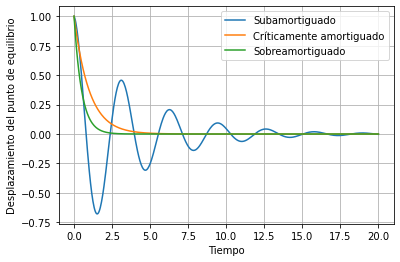

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t= np.linspace(0,20,500); 

Gamma_sub=0.5; 
Gamma_crit = 2
Gamma_sob = 4

w0=2; 

At=1;

theta=0;

omega1_sub=np.sqrt(w0**2-(Gamma_sub/2)**2);
sub_t=np.exp(-Gamma_sub*t/2)*np.cos(omega1_sub*t);
crit_t=np.exp(-Gamma_crit*t/2)
omega1_sob=np.sqrt((Gamma_sob/2)**2 - w0**2)
sobre_t=np.exp(-Gamma_sob*t/2)*np.cosh(omega1_sob*t);

plt.plot(t,sub_t, label = 'Subamortiguado')
plt.plot(t,crit_t, label = 'Críticamente amortiguado')
plt.plot(t,sobre_t, label = 'Sobreamortiguado')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento del punto de equilibrio')
plt.grid();
plt.legend();

Fijense que a $t \rightarrow \infty$, todas las soluciones van a cero, es decir que no importa en qué caso estemos, la parte homogenea de la solución va a desaparecer con el tiempo, esto le da el nombre a esta parte de la solución de _transitorio_ (por eso llamé $A_t$ a la amplitud). A nosotros no nos va a importar mucho esta parte de la solución y nos vamos a concentrar en el término que perdura en el tiempo que lo llamaremos _estacionario_ y lo obtendremos en la solución particular. Hallémosla

$$\ddot{x} + \Gamma \dot{x} + \omega_0^{2}x = \frac{F_0}{m} \cos{\Omega t}$$


¿Cómo resolvemos esto? Haciendole caso a la guía, obvio. El eunciado nos dice que nos da la solución para tiempos suficientemente grandes donde solo existe la parte estacionaria, exactamente lo que estamos buscando.

$$x_p(t) = A \sin{\Omega t} + B \cos{\Omega t}$$

Al igual que lo que hicieron antes, deriven y reemplacen en la ecuación.

$$(\omega_0^2 A - A \Omega^2 - \Gamma \Omega B) \sin{\Omega t} + (\omega_0^2 B + \Gamma \Omega A - B \Omega^2 - \frac{F_0}{m}) \cos{\Omega t} = 0$$

Fijense que agrupe las cosas como factores del seno y el coseno para poder usar el truco del ejercicio 5. El seno y el coseno son una base en el espacio de funciones, son LI así que cada factor debe ser 0 por separado.

$$(\omega_0^2 - \Omega^2) A - \Gamma \Omega B = 0$$
$$\Gamma \Omega A + (\omega_0^2 - \Omega^2) B - \frac{F_0}{m} = 0$$

Que, al igual que en el ejercicio 5 nos queda un sistema de 2x2 que podemos resolver.

$$A = \frac{F_0}{m} \, \frac{\Gamma \Omega}{\Gamma^2 \Omega^2 + (\omega_0^2-\Omega^2)^2}$$

$$B = \frac{F_0}{m} \, \frac{(\omega_0^2-\Omega^2)}{\Gamma^2\Omega^2 + (\omega_0^2-\Omega^2)^2}$$

Lo primero que llama la atención de estas ecuaciones es la resonancia cuando $\Omega = \omega_0$, veamos los gráficos.


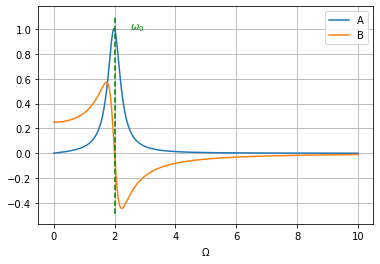

In [ ]:
m=1
F = 1
omega0 = 2
gamma = 0.5

omega = np.linspace(0,10,1000)

A = (F/m)*gamma*omega/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)
B = (F/m)*(omega0**2 - omega**2)/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)

plt.figure()
plt.plot(omega,A, label = 'A')
plt.plot(omega,B, label = 'B')
plt.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color = 'green') #Ploteo una linea punteada en omega0 para ver la resonancia, hablemos de esta sintaxis, acuerdense que sumar dos listas devuelve una nueva lista con la unión de las dos. Entonces multiplicar es como sumarla con sí misma, hubiese sido lo mismo escribir [omega0,omega0] pero quería mostrarles esto que suele ser útil cuando queremos una lista de algún elemento repetida muchas veces
plt.text(2.5,1,'$\omega_0$',color = 'green') #Estás son cosas que agrego para mostrarles que se pueden ir haciendo gráficos cada vez más lindos y para que sepan que estas herramientas existen. Si les confunde, no les den bola
plt.grid(True,which = 'major') #Idem lo de arriba
plt.xlabel('$\Omega$')
plt.legend(); #este ; del final lo pongo para que no aparezca un mensaje feo abajo, prueben sacarlo para ver qué pasa

Pero qué es esto? una amplitud es negativa? Se hace 0 en $\omega_0$? Pero a mí me dijeron que la resonancia es cuando la amplitud crece y se rompe todo! Bueno, no, eso está pasando con A, pero no con B, es por esto que A que, en la resonancia, absorbe toda la potencia que le damos, se llama amplitud absorbente. Por otro lado, a B se le llama amplitud elástica (o dispersiva) y se la asocia con absorción de potencia instantánea pero la potencia absorbida da cero si se la promedia en un ciclo completo (como en un resorte que absorbe y devuelve).

Otra cosa que podemos ver en el gráfico es que la resonancia no está exactamente en $\omega_0$, la amortiguación $\Gamma$ desplaza un poco el punto de máxima intensidad (prueben buscar el $\Omega$ que maximiza la amplitud $A$). Acá la parte analítica se las dejo a ustedes, yo les muestro lo que pasa en el gráfico cuando de a poco cambio gamma, vean que el pico se va desplazando

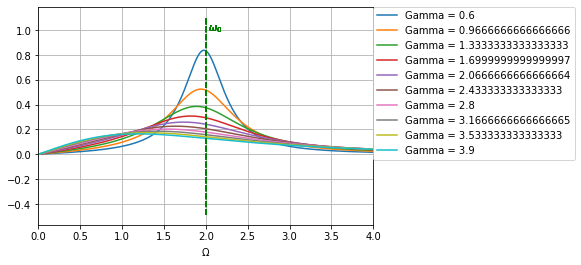

In [ ]:
gamVar = np.linspace(0.6,3.9,10)



for i in range(10):
  Avar = (F/m)*gamVar[i]*omega/(gamVar[i]**2 * omega**2 + (omega0**2 - omega**2)**2)
  plt.figure(0)
  plt.plot(omega,Avar, label = 'Gamma = ' + str(gamVar[i]))
  plt.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color = 'green') 
  plt.text(2.02,1,'$\omega_0$',color = 'green') 
  plt.grid(True,which = 'major')
  plt.xlabel('$\Omega$')
  plt.xlim([0,4]) 

plt.legend(loc = [1,0.3]);


Podemos ver lo mismo pero animado, esto también lo hice con un código de python y en otras IDEs, se trata solamente de agregar dos lineas dentro de ese for pero Colab no me lo reproducía como yo quería. Por eso, lo hice en otra IDE y lo subo como gif.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1uSNQ68i5pCT3zTfq_MyTf1LnJaPwI6Rx'  width="" height="200"/>

</center>
</figure>

Volvamos a la pontencia pero pongamosle números. la potencia instantánea está dada por $P(t) = F(t) \dot{x}_p$. Pero lo que más nos va a interesar es el promedio temporal durante de $P$ durante un período esto lo escribimos como $<P>$


$$<P> = \frac{1}{T}\int_0^T{P(t)} dt$$


$$<P> = \frac{1}{T}\int_0^T{F(t)\dot{x}_p(t)} dt$$

Donde $T = \frac{2\pi}{\Omega}$ es el período de nuestra onda. Para poder seguir les cuento que hay unas integrales que las vamos a usar durante toda la materia. Yo les cuento cuanto dan pero ustedes tienen la tarea de hacer las cuentas y entenderlas, son cuentas en una variable que no les deberían generar problemas pero como siempre si hay dudas consulten.

$$\int_0^T{\sin{\left(\frac{2\pi}{T} t\right)} \, dt} = 0$$
$$\int_0^T{\cos{\left(\frac{2\pi}{T} t\right)} \, dt} = 0$$
$$\int_0^T{\sin^2{\left(\frac{2\pi}{T} t\right)} \, dt} = \frac{T}{2}$$
$$\int_0^T{\cos^2{\left(\frac{2\pi}{T} t\right)} \, dt} = \frac{T}{2}$$
$$\int_0^T{\sin{\left(\frac{2\pi}{T} t\right)} \cos{\left(\frac{2\pi}{T} t\right)} \, dt} = 0$$

Volvamos a lo que estabamos haciendo.

$$P(t) = F_0 \cos{\Omega t}(A \Omega \cos{\Omega t} - B \Omega \sin{\Omega t})$$

Así que cuando integremos y dividamos por $T$, usando las integrales que ahora ya conocemos, vamos a obtener

$$<P(t)> = \frac{F_0 A \Omega}{2}$$

Esta es la potencia que le estamos trasmitiendo a la masa, pero también hay una parte de la potencia que se disipa por fricción. Cuánta potencia? Para calcularlo podemos hacer la misma integral de $P(t)$ en el tiempo pero en lugar de usar la potencia que usamos antes calculada con la fuerza aplicada a la masa, podemos usar la fuerza de fricción $F_r(t) = m \Gamma \dot{x}_p$. Entonces la Potencia disipada queda

$$<P_{fr}(t)> = \frac{1}{T}\int_0^T{m \Gamma \dot{x}^2_p} \, dt$$

Igual que antes, integramos, dividimos por $T$ y obtenemos $<P_{fr}(t)> = \frac{1}{2}m \Gamma \Omega^2 (A^2 + B^2)$. 

La guía nos dice que verifiquemos la igualdad de estas dos ecuaciones pero antes pensemos ¿por qué deberían ser iguales? En el régimen estacionario estamos haciendo una fuerza sobre la masa (realizando trabajo) y el movimiento es siempre el mismo. Si se disipara más de lo que se trasmite, la masa debería oscilar cada vez menos, si se trasmitiera más de lo que se disipa, la masa debería oscilar cada vez con más energía. Veamos qué nos dice Python.

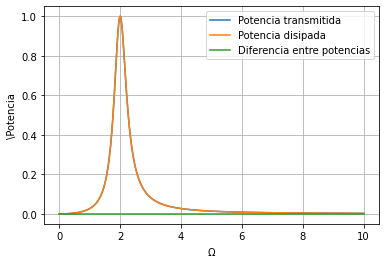

In [ ]:
P = F*A*omega/2
Pfr = 0.5*m*gamma*omega**2*(A**2+B**2)

plt.plot(omega,P,label = 'Potencia transmitida')
plt.plot(omega,Pfr, label = 'Potencia disipada')
plt.plot(omega, P - Pfr, label = 'Diferencia entre potencias')
plt.grid() 
plt.xlabel('$\Omega$')
plt.ylabel('\Potencia')
plt.legend(); #este ; del final lo pongo para que no aparezca un mensaje feo abajo, prueben sacarlo para ver qué pasa

Lo logramos! Fijense que la curva azul quedó abajo de la naranja, eso se ve en la verde que es constantemente 0. Justo lo que esperabamos.

Seguramente ya les habrán contado muchas cosas y mostrado muchos videos de cosas que se rompen por resonancia, sino les dejo algunos videitos del [puente de Tacoma](https://www.youtube.com/watch?v=3mclp9QmCGs) y [de un helicoptero que se rompe](https://www.youtube.com/watch?v=0GEj69NANc8). Pero yo les quería contar algo sobre la resonancia absorbente, que es más difícil de filmar, y por eso no se comparte en youtube y es menos mainstream pero no por eso menos interesante.

Cuando alguien construye un teatro/cine/sala de conciertos/sala de ensayo o cualquier lugar en donde sea muy importante tener buena acústica, se suele hacer un diseño especial dependiendo del lugar y de la finalidad para que se use. Cuando construyen o diseñan un recinto, es posible, que lx ingenierx, quiera reducir una frecuencia determinada, una forma de hacer esto es con sistemas masa resorte colocados en la pared. Los ven?


<figure>
<center>
<img src='https://drive.google.com/uc?id=1XvPuwhMdyUBVrJQ6qGx0pU8B5tHq_i7O'  width="" height="200"/>
</center>
</figure>

Están un poco ocultos, lo se, pero son esos agujeros en la pared y el modelo que se usa para estudiarlos es el mismo que vimos recién. Hagamos un poco de zoom.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Q4J6Sez5kL8hLkAtD52iiYasgiPq99Qv'  width="" height="200"/>
</center>
</figure>

Cuando el aire intenta entar por el cuello de los resonadores el aire que hay dentro se comprime como un resorte y empuja para salir, qué parte juega el rol de la masa? la masa de aire que haya en el cuello.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1MHmAYOm9y3vpREuVZUZYewB4dMDtWERP'  width="" height="200"/>
</center>
</figure>

La onda de presión (sonido) emitida por un parlante, nuestra voz o lo que sea la fuente emisora, generarán la fuerza sobre este sistema. El resultado? si se configura correctamente se puede lograr que predomine la amplitud absorbente para una dada frecuencia y mejorar la acústica de un recinto con estos simples sistemitas.